# Bengaluru House Price Prediction
## Data Analysis and Machine Learning Model

This project aims to analyze house price data in Bengaluru and build a predictive model. We will:
- Explore and clean the data
- Engineer relevant features
- Train and evaluate a regression model to predict prices


In [217]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1. Loading the Dataset

We begin by loading the dataset and inspecting its structure.


In [218]:
bangDF = pd.read_csv("../dataset/Bengaluru_House_Data.csv")
bangDF.head(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## 2. Initial Data Exploration

To understand the dataset, we check:
- The number of rows and columns
- Missing values
- Data types of each column


In [167]:
bangDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
bangDF.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
bangDF.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

## 3. Data Cleaning

To ensure data quality, we perform the following steps:
- Identify missing values
- Remove duplicates (if any)
- Standardize data formats

We start by checking for missing values in each column.


In [220]:
bangDF.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [221]:
# Drop irrelevant columns from the dataset
df2 = bangDF.drop(["area_type","availability","society"], axis="columns")

In [222]:
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [10]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

### Handling Missing Values

Since missing values in key columns can impact analysis and modeling, we remove rows where:
- **`location`** is missing (essential for spatial analysis).
- **`size`** is missing (affects area-related calculations).
- **`bath`** is missing (important for feature engineering).

This helps maintain data integrity.



In [223]:
# Drop rows with missing values in critical columns: location, size, and bath
df3 = df2.dropna(subset = ["location", "size", "bath"])

In [224]:
df3.isnull().sum()

location        0
size            0
total_sqft      0
bath            0
balcony       536
price           0
dtype: int64

In [13]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [15]:
df3[df3['size'] == '1 RK'].shape[0]

13

In [16]:
df3.shape

(13246, 6)

In [17]:
df4 = df3[df3['size'] != '1 RK']

In [18]:
df4.shape

(13233, 6)

In [225]:
# Extract the numeric value (number of bedrooms) from the 'size' column
df4['bhk'] = df4['size'].apply(lambda x: x.split(' ')[0])

In [226]:
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [228]:
df5 = df4.drop(columns =["size"])

In [229]:
df5.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [230]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13233 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13233 non-null  object 
 1   total_sqft  13233 non-null  object 
 2   bath        13233 non-null  float64
 3   balcony     12697 non-null  float64
 4   price       13233 non-null  float64
 5   bhk         13233 non-null  object 
dtypes: float64(3), object(3)
memory usage: 723.7+ KB


In [232]:
# Convert 'bhk' column to integer type for numerical operations
df5['bhk'] = df5['bhk'].astype(int)

In [233]:
df5.isnull().sum()

location        0
total_sqft      0
bath            0
balcony       536
price           0
bhk             0
dtype: int64

In [234]:
df5.describe()

,bath,balcony,price,bhk
count,13233.000000,12697.000000,13233.000000,13233.000000
mean,2.694249,1.585493,112.472175,2.803673
std,1.341115,0.816759,149.125993,1.295162
min,1.000000,0.000000,8.000000,1.000000
25%,2.000000,1.000000,50.000000,2.000000
50%,2.000000,2.000000,72.000000,3.000000
75%,3.000000,2.000000,120.000000,3.000000
max,40.000000,3.000000,3600.000000,43.000000


In [235]:
# Check unique values in the 'total_sqft' column to identify inconsistencies
df5.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2063,), dtype=object)

### Defining a Function to Check Float Conversion

The `total_sqft` column contains values in different formats, including:
- Numeric values (`1200`, `1500.5`)
- Ranges (`"1200 - 1500"`)
- Non-numeric values

To clean the data, we define a function `isfloat(x)` that:
- Returns `True` if `x` can be converted to a float
- Returns `False` otherwise


In [238]:
# Function to check if a value can be converted to a float
def isfloat(x):
    try:
        float(x)  # Attempt to convert to float
        return True  # Return True if successful
    except:
        return False  # Return False if conversion fails

In [239]:
df5[~df5['total_sqft'].apply(isfloat)].head(10)

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
648,Arekere,4125Perch,9.0,NaN,265.000,9
661,Yelahanka,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,3090 - 5002,4.0,0.0,445.000,4


### Handling Ranges in `total_sqft`

The `total_sqft` column contains some values in range format, e.g., `"1200 - 1500"`.  
To standardize these:
- If the value is a range (`"min - max"`), we take the **average**:  
  \[
  \frac{\text{min} + \text{max}}{2}
  \]
- If it's a single number, we convert it to `float`.
- If conversion fails, we return `None` (for invalid values).


In [243]:
# Function to convert range values to their average or keep as float
def convertRangeToFloat(x):
    tokens = x.split('-')  # Split the value by '-'
    
    # If it's a range, take the average of min and max
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2  
    
    # Try converting to float if it's a single number
    try:
        return float(x)
    except:
        return None  # Return None for invalid values

In [244]:
df5.shape

(13233, 6)

In [246]:
df6 =df5.copy()

# Apply the function to convert 'total_sqft' values into numerical format
df6['total_sqft']  = df6['total_sqft'].apply(convertRangeToFloat)

In [247]:
df6.isnull().sum()

location        0
total_sqft     46
bath            0
balcony       536
price           0
bhk             0
dtype: int64

In [248]:
df7 = df6.dropna(subset=['total_sqft'])

In [249]:
df7.shape

(13187, 6)

In [250]:
df7.isnull().sum()

location        0
total_sqft      0
bath            0
balcony       532
price           0
bhk             0
dtype: int64

### Correlation Matrix Heatmap

To understand the relationships between numerical features, we:
- Compute the correlation matrix for numerical variables.
- Visualize correlations using a heatmap.

This helps identify:
- Strong positive or negative correlations.
- Features that may be redundant or important for the model.

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

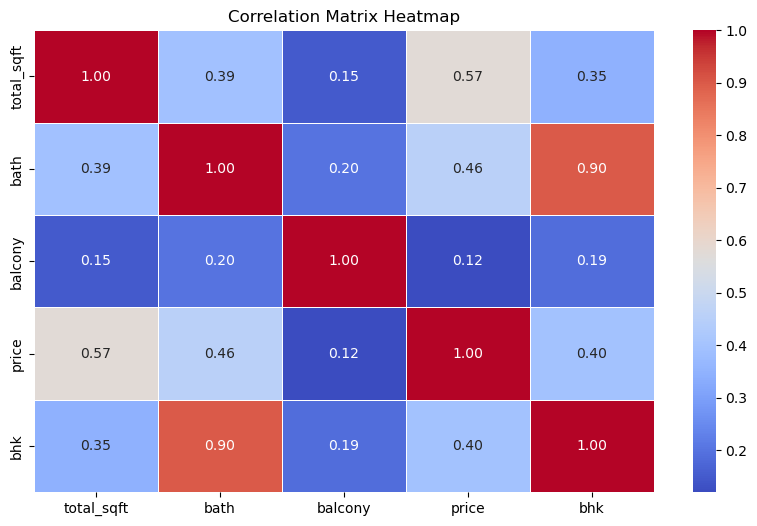

In [253]:
df5_no_location = df7.drop(columns = 'location')  # Drop 'location' as it's categorical

# Compute the correlation matrix for numerical features
corr_matrix = df5_no_location.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")

In [254]:
# Drop the 'balcony' column as it has no correlation with price
df7 = df7.drop(columns = 'balcony')

## 4. Feature Engineering

In this section, we create new features to enhance our model's predictive power.  
Feature engineering helps in:
- Creating meaningful representations of existing data.
- Standardizing values for better comparisons.
- Improving model performance by capturing useful trends.

### Creating `price_per_sq_ft` Feature

To standardize property prices, we calculate the **price per square foot** using:
\[
\text{price per sq. ft} = \frac{\text{price} \times 100000}{\text{total_sqft}}
\]
- Prices in the dataset are given in **lakhs**, so we multiply by `100000` to convert to rupees.
- This feature helps in comparing properties of different sizes on a common scale.


In [256]:
df8= df7.copy()
df8['price_per_sq_ft'] = df8['price']*100000/ df8['total_sqft']

In [257]:
df8.head(5)

,location,total_sqft,bath,price,bhk,price_per_sq_ft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [183]:
len(df8.location.unique())

1290

In [258]:
# Remove leading and trailing spaces from 'location' values
df8['location'] = df8['location'].apply(lambda x: x.strip())

# Count occurrences of each location and sort in descending order
location_stats = df8.groupby('location')['location'].agg('count').sort_values(ascending=False)

# Display location distribution
location_stats

location
Whitefield                                        532
Sarjapur  Road                                    392
Electronic City                                   302
Kanakpura Road                                    264
Thanisandra                                       232
                                                 ... 
4th Block HBR Layout                                1
5th block Koramangala                               1
6th Block Jayanagar                                 1
6th Block Rajaji Nagar                              1
6th block banashankari 3rd stage, 100 feet ORR      1
Name: location, Length: 1287, dtype: int64

In [185]:
len(location_stats[location_stats <= 10])

1047

In [259]:
# Filtering locations that have 10 or fewer occurrences
location_stats_less_than_10 = location_stats[location_stats <= 10]

In [187]:
len(df8.location.unique())

1287

### Grouping Less Frequent Locations into 'Other' (Dimensionality Reduction)
To simplify the dataset and reduce dimensionality, locations that appear 10 times or fewer are replaced with the label `'other'`. 
This helps:
- Reduce noise in the dataset.
- Improve generalization for machine learning models.
- Prevent overfitting caused by too many rare location categories.


In [260]:
# Replacing locations with 10 or fewer occurrences with 'other' 
df8.location = df8.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [189]:
len(df8.location.unique())

241

In [190]:
df8.head(10)

,location,total_sqft,bath,balcony,price,bhk,price_per_sq_ft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,NaN,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,NaN,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.244275
9,other,1020.0,6.0,NaN,370.00,6,36274.509804


In [261]:
# Filtering out properties where the average sqft per BHK is less than 300
df8[(df8['total_sqft']/df8['bhk']) < 300]

,location,total_sqft,bath,price,bhk,price_per_sq_ft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13277,other,1400.0,7.0,218.0,7,15571.428571
13279,other,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649


### Removing Outliers Based on Square Footage per BHK
To maintain data quality, we filter out properties where the average square footage per bedroom (BHK) is less than 300 sqft. 
Such properties are likely to be outliers or incorrectly entered data points, as a livable space per bedroom should generally be larger.

In [263]:
df9 = df8[~((df8['total_sqft']/df8['bhk']) < 300)]

In [264]:
df9.shape

(12444, 6)

In [265]:
df9['price_per_sq_ft'].describe()

count     12444.000000
mean       6309.294348
std        4169.956605
min         267.829813
25%        4210.280144
50%        5294.117647
75%        6917.657750
max      176470.588235
Name: price_per_sq_ft, dtype: float64

Text(0.5, 1.0, 'Box Plot of Price Per Square Foot')

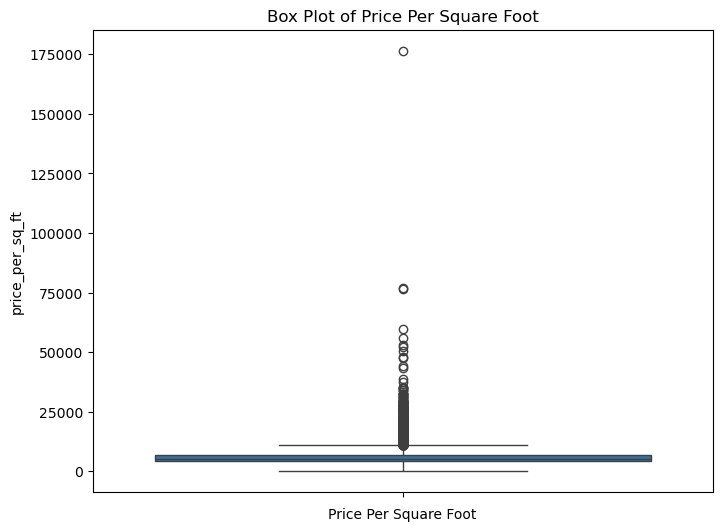

In [196]:
plt.figure(figsize = (8,6))
sns.boxplot(y = df9['price_per_sq_ft'])
plt.xlabel('Price Per Square Foot')
plt.title('Box Plot of Price Per Square Foot')

## Removing Outliers per Location using IQR
This function removes outliers from a specified column using the **Interquartile Range (IQR) method**, applied separately for each unique location.

### **Why use IQR for outlier detection?**
- The **IQR method** is effective in detecting extreme values.
- By applying it separately per location, we ensure that each location’s unique price distribution is considered.
- This method helps in **reducing noise** while keeping meaningful data.

### **How does the function work?**
1. The dataset is grouped by `location`, meaning outlier detection is performed **per location**.
2. The **first quartile (Q1)** and **third quartile (Q3)** are computed for the specified column.
3. The **Interquartile Range (IQR) = Q3 - Q1** is calculated.
4. A lower and upper bound is set using `l_multiplier` and `u_multiplier`, which adjust the sensitivity of outlier detection.
5. Data points falling outside this range are **filtered out**.
6. The cleaned data is returned as a new DataFrame.

**Adjusting the multipliers (`l_multiplier`, `u_multiplier`) allows for controlling the strictness of outlier removal.** 

For instance:
- A typical choice is **1.5** for both multipliers.
- Higher values (e.g., **3.0**) make outlier detection **less strict**, keeping more data.
- Lower values (e.g., **1.0**) make it **more aggressive**, removing more outliers.



In [267]:
def remove_outliers_per_location(df, column, l_multiplier, u_multiplier):
    """
    Removes outliers for a given column based on the Interquartile Range (IQR) method,
    applied separately for each location.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing property data.
    column (str): The column on which outlier detection should be applied.
    l_multiplier (float): Multiplier for IQR to define the lower bound.
    u_multiplier (float): Multiplier for IQR to define the upper bound.

    Returns:
    pd.DataFrame: A new DataFrame with outliers removed.
    """
    
    df_out = pd.DataFrame()  # Initialize an empty DataFrame to store results

    # Iterate through each unique location in the dataset
    for location, sub_df in df.groupby('location'):
        Q1 = sub_df[column].quantile(0.25)  # First quartile (25th percentile)
        Q3 = sub_df[column].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range (IQR)

        # Define lower and upper bounds for outlier detection
        lower_bound = Q1 - (l_multiplier * IQR)
        upper_bound = Q3 + (u_multiplier * IQR)

        # Filter data within the acceptable range
        filtered_subdf = sub_df[(sub_df[column] >= lower_bound) & (sub_df[column] <= upper_bound)]

        # Append the cleaned data to the output DataFrame
        df_out = pd.concat([df_out, filtered_subdf], ignore_index=True)
    
    return df_out  # Return the cleaned dataset


In [268]:
df10 = remove_outliers_per_location(df9,'price_per_sq_ft',l_multiplier=0.8, u_multiplier= 1.5)

In [269]:
df10.head()

,location,total_sqft,bath,price,bhk,price_per_sq_ft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,2400.0,4.0,450.0,4,18750.000000
4,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333


Text(0.5, 1.0, 'Box Plot of Price Per Square Foot')

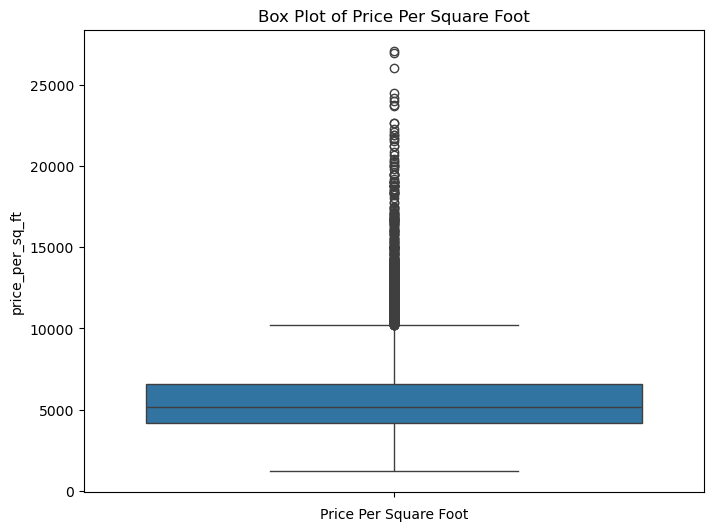

In [270]:
plt.figure(figsize = (8,6))
sns.boxplot(y = df10['price_per_sq_ft'])
plt.xlabel('Price Per Square Foot')
plt.title('Box Plot of Price Per Square Foot')

In [271]:
df10.describe()

,total_sqft,bath,price,bhk,price_per_sq_ft
count,11372.000000,11372.000000,11372.000000,11372.000000,11372.000000
mean,1518.954380,2.495779,94.510331,2.590573,5769.179385
std,892.873436,1.004028,95.886980,0.916710,2506.883207
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1107.000000,2.000000,48.122500,2.000000,4197.987910
50%,1290.000000,2.000000,67.500000,2.000000,5200.000000
75%,1655.000000,3.000000,104.000000,3.000000,6600.000000
max,30400.000000,16.000000,2200.000000,16.000000,27083.333333


## Scatter Plot: 2 BHK vs 3 BHK Prices
This function visualizes the price distribution of **2 BHK and 3 BHK** properties in a given location.

### **Why use this scatter plot?**
- Helps compare pricing patterns of 2 BHK and 3 BHK properties.
- Identifies outliers where a 3 BHK is priced lower than a 2 BHK.
- Assists in understanding price variation concerning square footage.

### **How to interpret the plot?**
- **Blue dots** represent 2 BHK properties.
- **Green plus markers (+)** represent 3 BHK properties.
- Ideally, **3 BHK properties should be priced higher** than 2 BHK properties with similar square footage.
- If **green crosses overlap with or fall below blue dots**, it could indicate inconsistencies, pricing anomalies.

In [277]:
def plot_scatter_plot(df, location):
    """
    Plots a scatter plot comparing 2 BHK and 3 BHK property prices for a given location.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing property data.
    location (str): The location to filter the data for visualization.

    Returns:
    None (Displays the scatter plot).
    """

    # Filtering the dataset for 2 BHK and 3 BHK properties in the given location
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]

    # Setting figure size for better visualization
    matplotlib.rcParams['figure.figsize'] = (12, 9)

    # Scatter plot for 2 BHK properties (blue dots)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)

    # Scatter plot for 3 BHK properties (green plus markers)
    plt.scatter(bhk3.total_sqft, bhk3.price, color='green', marker='+', label='3 BHK', s=50)

    # Adding labels and title
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(f'Price vs Square Footage in {location}')

    # Adding a legend to distinguish between 2 BHK and 3 BHK
    plt.legend()

    # Display the plot
    plt.show()

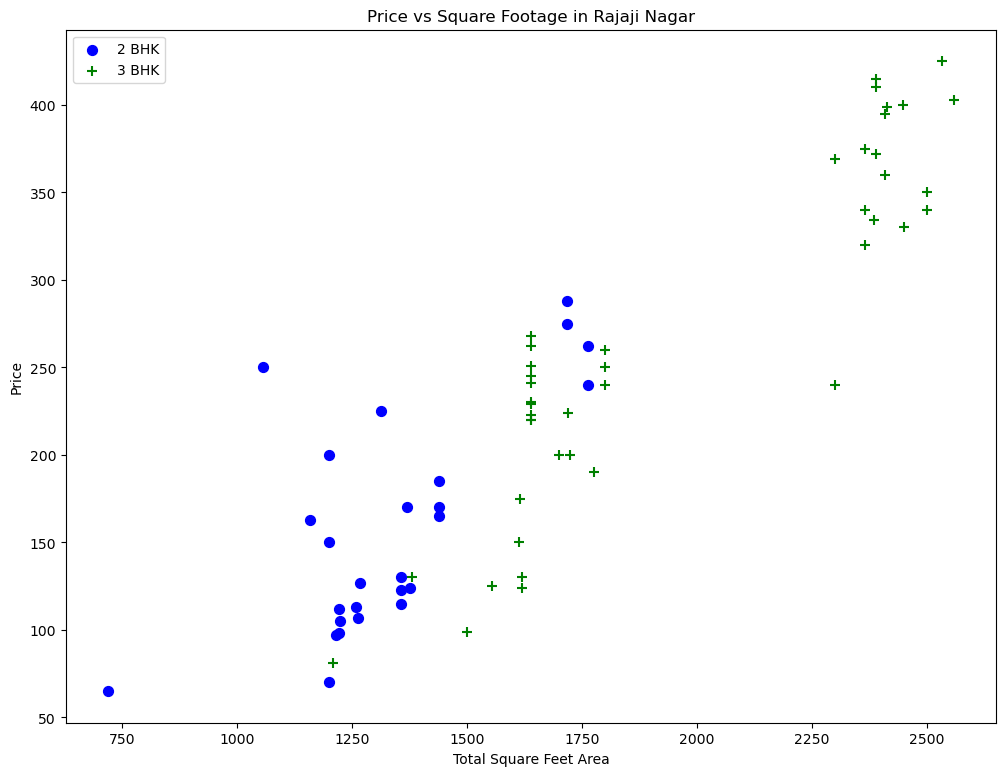

In [278]:
plot_scatter_plot(df10, 'Rajaji Nagar')

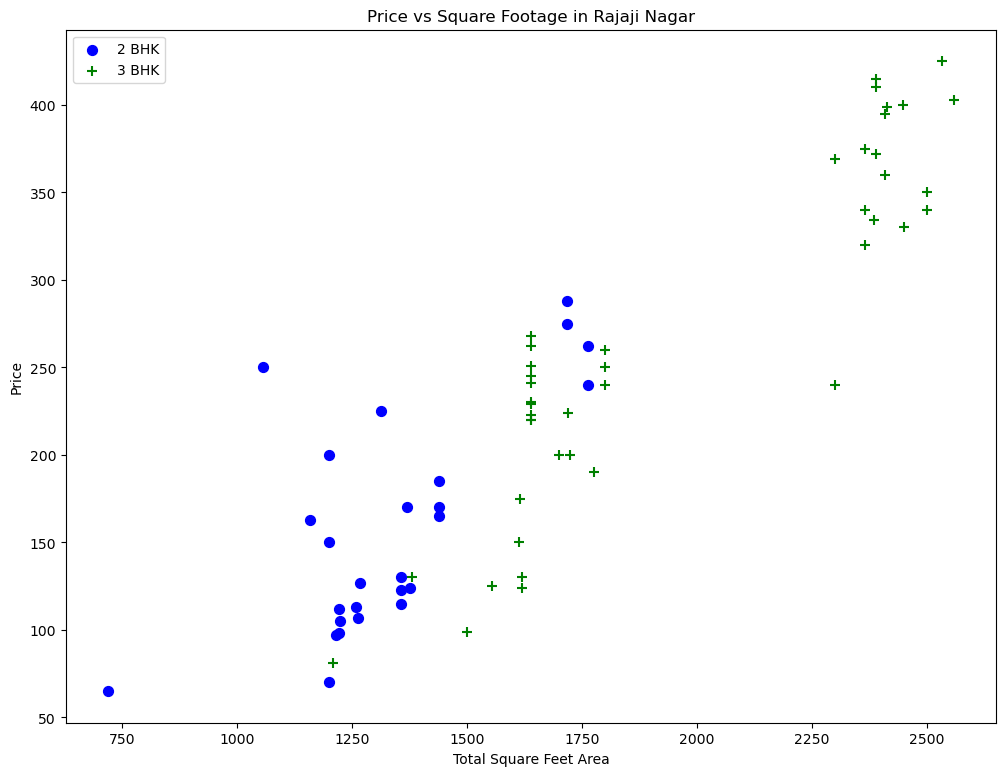

In [279]:
plot_scatter_plot(df10, 'Rajaji Nagar')

### Removing Outliers Based on BHK Pricing
This function removes cases where a **higher BHK unit (e.g., 3 BHK)** is priced **lower than the mean price per square foot** 
of a **lower BHK unit (e.g., 2 BHK)** in the same location.

### **Why is this important?**
- Ensures pricing follows a logical pattern (i.e., larger units should generally cost more per sqft).
- Helps remove **anomalies**, such as mispriced properties or incorrect data entries.
- Improves data quality before feeding it into predictive models.

### **How does the function work?**
1. **Groups data by location** to ensure fair comparisons within each area.
2. **Calculates the mean, standard deviation, and count** of `price_per_sq_ft` for each BHK category in that location.
3. **Checks for anomalies** where a higher BHK unit is priced lower than the mean of a lower BHK.
4. If the **lower BHK category has more than 5 listings**, it flags the **higher BHK properties** priced below the mean as outliers.
5. **Removes the outliers** from the dataset.


In [281]:
def rm_outliers_bhk(df):
    """
    Removes outliers where a higher BHK unit is priced lower than the mean price per square foot 
    of the previous (lower) BHK unit within the same location.

    Parameters:
    df (pd.DataFrame): The input DataFrame containing property data.

    Returns:
    pd.DataFrame: A new DataFrame with outliers removed.
    """

    exclude_indices = np.array([])  # Initialize an empty array to store indices of outliers

    # Group data by location to ensure fair price comparisons
    for location, location_df in df.groupby('location'):
        
        # Compute mean, standard deviation, and count of price per square foot for each BHK in the location
        bhk_stats = location_df.groupby('bhk')['price_per_sq_ft'].agg(['mean', 'std', 'count']).to_dict(orient='index')

        # Iterate over each BHK group in the location
        for bhk, bhk_df in location_df.groupby('bhk'):
            
            # Retrieve statistics for the previous (bhk-1) category
            stats = bhk_stats.get(bhk - 1)
            
            # Check if the previous BHK category exists and has more than 5 data points
            if stats and stats['count'] > 5:
                
                # Identify properties where a higher BHK is priced lower than the mean of the lower BHK
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sq_ft < stats['mean']].index.values)

    # Remove identified outliers from the dataset
    return df.drop(exclude_indices, axis='index')


In [282]:
df11 = rm_outliers_bhk(df10)

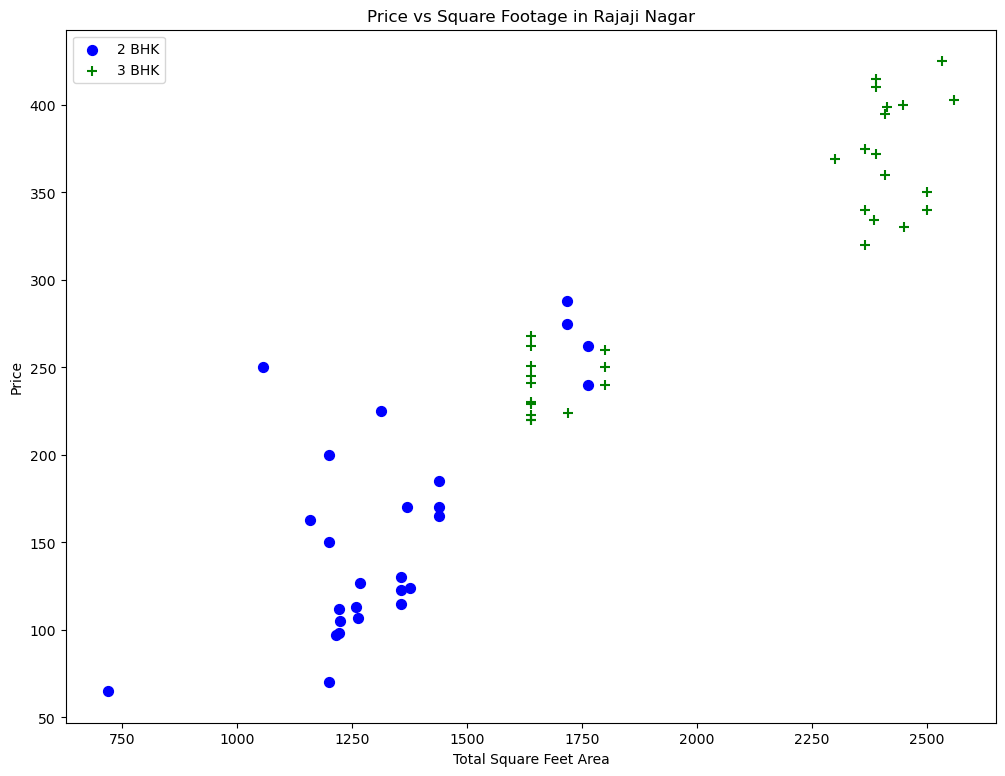

In [283]:
plot_scatter_plot(df11, 'Rajaji Nagar')

In [284]:
df11.shape[0]

8127

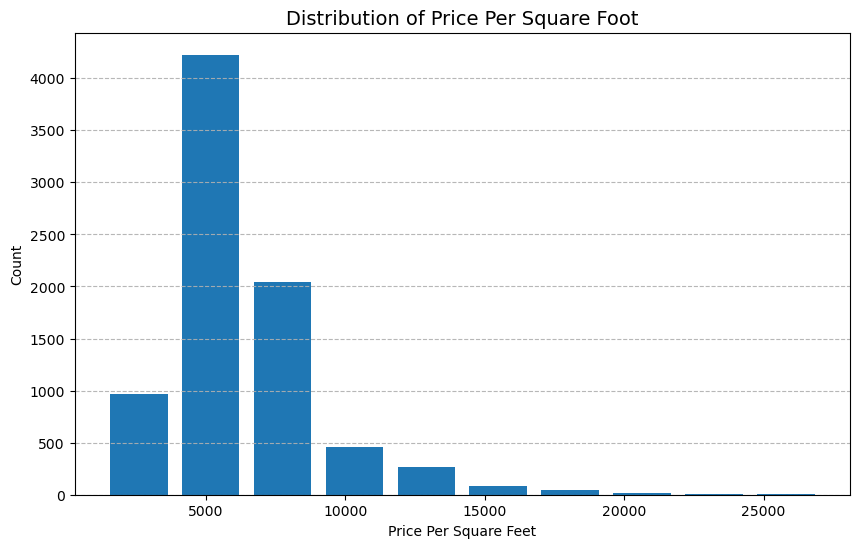

In [285]:
plt.figure(figsize = (10,6))
plt.hist(df11['price_per_sq_ft'], rwidth = 0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')
plt.title('Distribution of Price Per Square Foot', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.9)

In [286]:
df11.bath.unique()

array([ 4.,  3.,  2.,  5.,  1.,  8.,  7.,  6.,  9., 12., 10., 16., 13.])

In [209]:
df11[df11['bath'] > 10]

,location,total_sqft,bath,price,bhk,price_per_sq_ft
5987,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
9602,other,12000.0,12.0,525.0,10,4375.000000
9691,other,10000.0,16.0,550.0,16,5500.000000
10429,other,6000.0,12.0,150.0,11,2500.000000
10762,other,5425.0,13.0,275.0,13,5069.124424


### Identifying Unrealistic Bathroom Counts
This operation filters properties where the number of bathrooms **exceeds the number of bedrooms (BHK) by more than 2**.

### Why is this important?
- In most residential properties, the number of bathrooms is usually **not much greater than the number of bedrooms**.
- **Unrealistic values** (e.g., a 2 BHK with 6 bathrooms) might be data entry errors or outliers.
- Helps improve **data quality and model accuracy** by removing anomalies.

In [288]:
# Filtering properties where the number of bathrooms exceeds bedrooms (BHK) + 2
df11[df11.bath > (df11.bhk + 2)]

,location,total_sqft,bath,price,bhk,price_per_sq_ft
1786,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5936,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6523,Rajaji Nagar,7500.0,8.0,1700.0,5,22666.666667
7732,Thanisandra,1806.0,6.0,116.0,3,6423.034330
9527,other,11338.0,9.0,1000.0,6,8819.897689


In [290]:
# Removing properties where the number of bathrooms exceeds (BHK + 2)
df12 = df11[~(df11.bath > (df11.bhk + 2))]

In [291]:
df12.shape[0]

8122

In [214]:
df12.head()

,location,total_sqft,bath,price,bhk,price_per_sq_ft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,2400.0,4.0,450.0,4,18750.000000
4,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333


In [292]:
# Dropping the 'price_per_sq_ft' column as it's no longer needed
df13 = df12.drop(['price_per_sq_ft'], axis=1)

In [294]:
df13.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,2400.0,4.0,450.0,4
4,1st Block Jayanagar,1200.0,2.0,130.0,3


## 5. Exploratory Data Analysis (EDA)

After cleaning and preprocessing the dataset, it's important to analyze patterns, distributions, and relationships within the data. The following visualizations will help us gain insights into the housing market.

### 5.1. Distribution of Prices


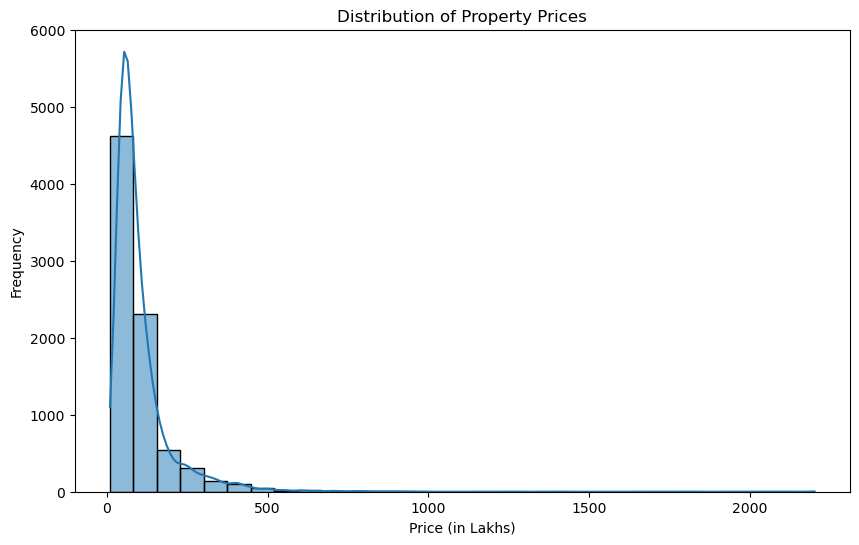

In [301]:
plt.figure(figsize=(10, 6))
sns.histplot(df13['price'], bins=30, kde=True)
plt.xlabel('Price (in Lakhs)')
plt.ylabel('Frequency')
plt.title('Distribution of Property Prices')
plt.show()


### 5.2. Price vs Total Square Feet (Scatter Plot)

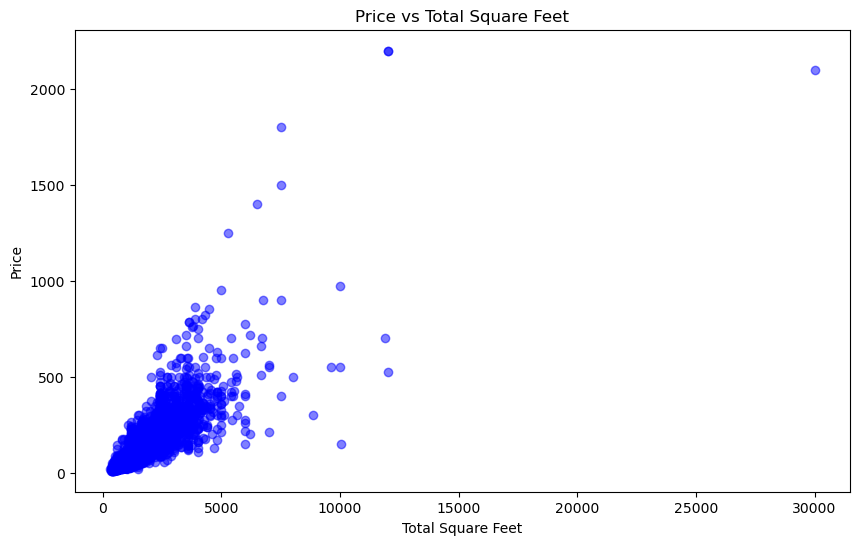

In [302]:
plt.figure(figsize=(10, 6))
plt.scatter(df13['total_sqft'], df13['price'], alpha=0.5, color='blue')
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.title('Price vs Total Square Feet')
plt.show()

### 5.3. Box Plot of Prices by BHK

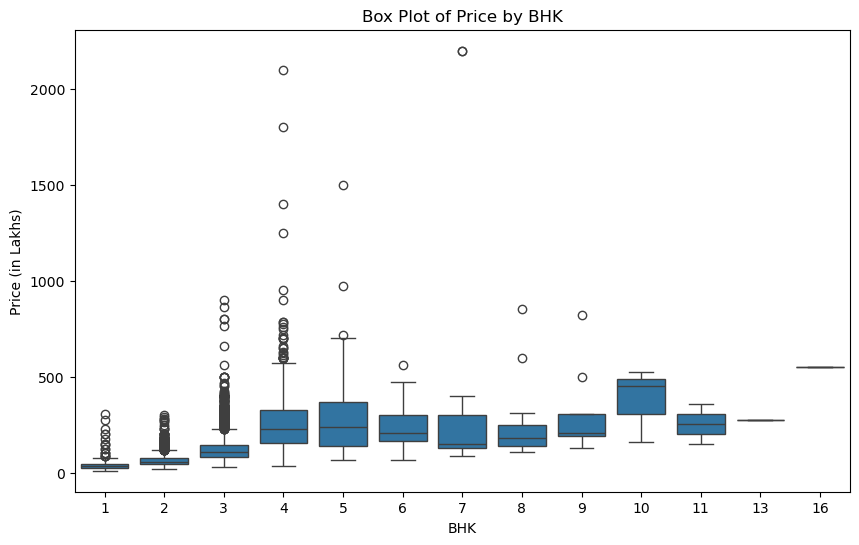

In [303]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df13['bhk'], y=df13['price'])
plt.xlabel('BHK')
plt.ylabel('Price (in Lakhs)')
plt.title('Box Plot of Price by BHK')
plt.show()

### 5.4 Count of Properties per BHK

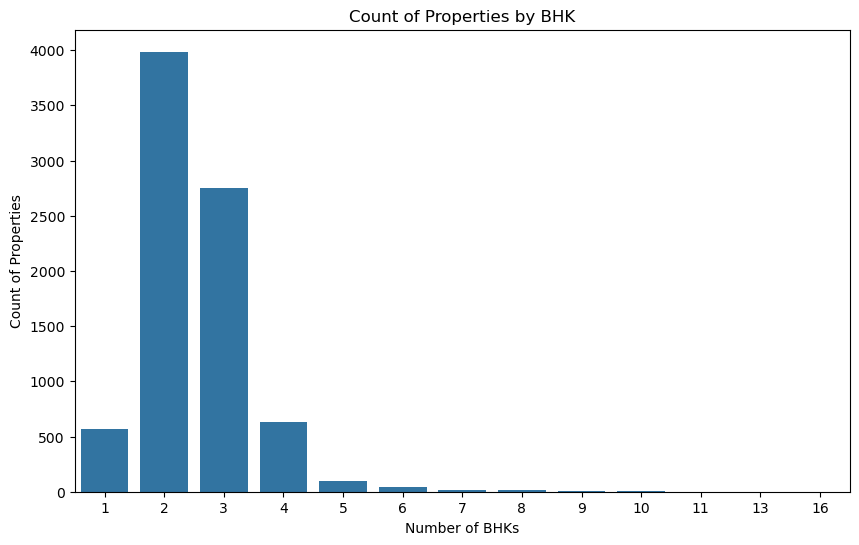

In [304]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df13['bhk'])
plt.xlabel('Number of BHKs')
plt.ylabel('Count of Properties')
plt.title('Count of Properties by BHK')
plt.show()


### 5.5 Top 10 Locations with Most Listings

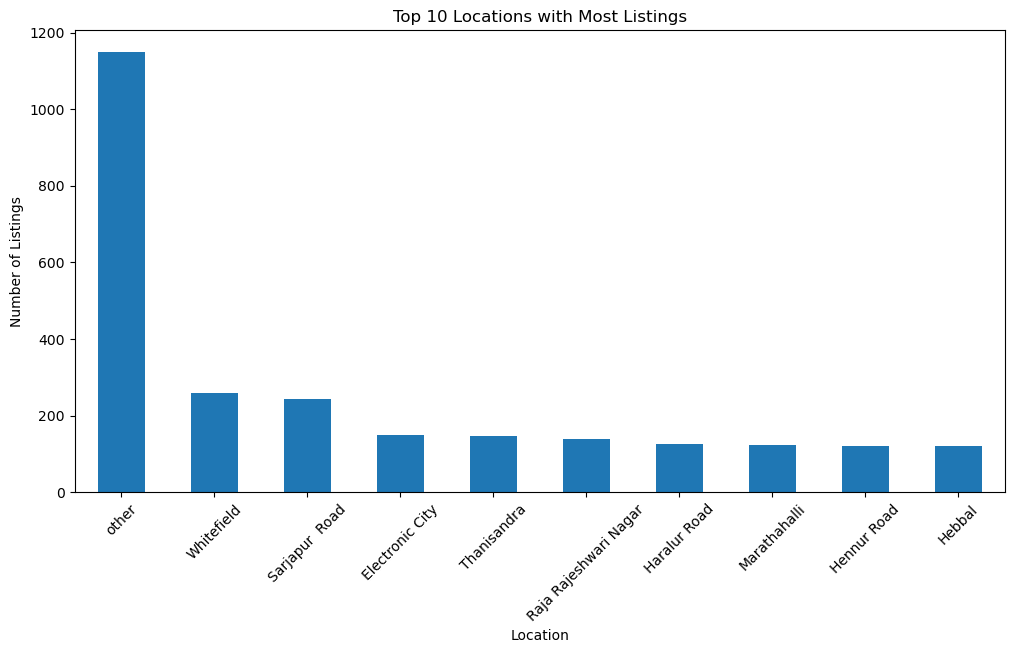

In [305]:
plt.figure(figsize=(12, 6))
df13['location'].value_counts().nlargest(10).plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Number of Listings')
plt.title('Top 10 Locations with Most Listings')
plt.xticks(rotation=45)
plt.show()

## **6. Model Building**

After performing **data cleaning** and **exploratory data analysis (EDA)**, we now proceed with **building a predictive model** to estimate property prices.


### Encoding Categorical Location Data
Since `location` is a categorical variable, we convert it into numerical format using **One-Hot Encoding**.


In [308]:
df13['location'] = df13['location'].astype(str)
encoded_locations = pd.get_dummies(df13['location']).astype(int)
print(encoded_locations)

       1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                        1                   0                          0   
1                        1                   0                          0   
2                        1                   0                          0   
3                        1                   0                          0   
4                        1                   0                          0   
...                    ...                 ...                        ...   
11363                    0                   0                          0   
11364                    0                   0                          0   
11367                    0                   0                          0   
11368                    0                   0                          0   
11371                    0                   0                          0   

       2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0 

In [309]:
# Merging the encoded location data with the original dataset
# Dropping the 'other' column to avoid unnecessary dimensions
df14 = pd.concat([df13, encoded_locations.drop(['other'], axis=1)], axis='columns')

In [310]:
# Dropping the original 'location' column as it has been encoded
df15 = df14.drop(['location'], axis=1)

In [311]:
df15.shape

(8122, 244)

### Defining Features (X) for Model Training
We separate the independent variables (features) from the target variable (`price`).

In [313]:
# Defining feature matrix (X) by dropping the target variable 'price'
X = df15.drop('price', axis=1)

In [315]:
# Defining the target variable (y) as 'price'
y = df15.price
y

0        428.0
1        194.0
2        235.0
3        450.0
4        130.0
         ...  
11363     70.0
11364    200.0
11367    110.0
11368     26.0
11371    400.0
Name: price, Length: 8122, dtype: float64

### Splitting Data into Training and Testing Sets
To evaluate model performance, we split the dataset into training and testing sets.

In [316]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

### Training a Linear Regression Model
We train a **Linear Regression** model on the dataset and evaluate its performance.


In [317]:
from sklearn.linear_model import LinearRegression

# Initializing the Linear Regression model
lr_clf = LinearRegression()

# Training the model using the training dataset
lr_clf.fit(X_train, y_train)

# Evaluating the model's performance using the R² score on the test set
lr_clf.score(X_test, y_test)


0.8318504964539041

In [318]:
# Cross-Validation for Model Performance Evaluation
# To ensure the model performs well on different data splits, we apply **cross-validation**.

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# Defining a ShuffleSplit cross-validator with 5 splits (80% train, 20% test each time)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

# Performing cross-validation on the Linear Regression model
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.77871801, 0.79479548, 0.77728308, 0.78881494, 0.82845541])

### Finding the Best Algorithm using Randomized Search
To optimize model performance, we test multiple algorithms and tune their hyperparameters using **RandomizedSearchCV**.


In [322]:
from sklearn.model_selection import RandomizedSearchCV

def best_algo_finder(X, y):
    algos = {
        'linear_regression': { 
            'model': LinearRegression(),
            'parameters': {'fit_intercept': [True, False]}
        },

        'lasso': { 
            'model': Lasso(),
            'parameters': {'alpha': [0.1, 1], 'selection': ['random', 'cyclic']}
        },

        'decision_tree': { 
            'model': DecisionTreeRegressor(),
            'parameters': {'criterion': ['squared_error'], 'max_depth': [None, 10]}
        },
        
        'random_forest': {
            'model': RandomForestRegressor(),
            'parameters': {'n_estimators': [100], 'max_depth': [None, 10]}
        },
        
        'xgboost': {
            'model': XGBRegressor(),
            'parameters': {'n_estimators': [100], 'learning_rate': [0.1], 'max_depth': [6]}
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = RandomizedSearchCV(config['model'], config['parameters'], cv=cv, n_iter=3, scoring='r2', n_jobs=-1, random_state=0)
        gs.fit(X, y)

        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_parameters': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_parameters'])


In [324]:
# Running the optimized function
best_models = best_algo_finder(X, y)
best_models

C:\Users\RAUNAKSINGH KHALSA\anaconda3\envs\bengP\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\RAUNAKSINGH KHALSA\anaconda3\envs\bengP\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\RAUNAKSINGH KHALSA\anaconda3\envs\bengP\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=3. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\RAUNAKSINGH KHALSA\anaconda3\envs\bengP\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searc

,model,best_score,best_parameters
0,linear_regression,0.783599,{'fit_intercept': True}
1,lasso,0.759209,"{'selection': 'cyclic', 'alpha': 0.1}"
2,decision_tree,0.693308,"{'max_depth': 10, 'criterion': 'squared_error'}"
3,random_forest,0.794299,"{'n_estimators': 100, 'max_depth': None}"
4,xgboost,0.794418,"{'n_estimators': 100, 'max_depth': 6, 'learnin..."


### Selecting the Best Model for Price Prediction
After performing **Grid Search & Cross-Validation**, we analyzed multiple models and their performance. Based on the **R² score**, we selected the best-performing model.

---

#### **Model Selection Conclusion**
#### **Best Model → Random Forest**
**Highest R² Score**, meaning it explains the most variance in price.  
**Less prone to overfitting** than Decision Trees.  
**Handles non-linearity well**, making it **ideal for real estate pricing**.  

---

#### **Alternative → XGBoost**
Slightly lower than Random Forest but **still highly accurate**.  
**More efficient** for large-scale deployment & real-time predictions.  
**Better feature selection** capabilities.  

---

#### **Linear Regression → Baseline Model**
Performs **reasonably well**, but assumes **a linear relationship**.  
**Lacks ability to capture complex interactions** in price factors.  

---


In [352]:
X

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2400.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11363,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11364,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11367,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11368,812.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **7.Train & Evaluate the Best Model**
Now that we selected **Random Forest**, let's train and evaluate it.

In [329]:
from sklearn.metrics import r2_score, mean_absolute_error

# Train the best Random Forest model
best_rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
best_rf.fit(X_train, y_train)

# Predictions
y_pred_rf = best_rf.predict(X_test)

# Evaluate performance
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Random Forest R² Score: {r2_rf:.4f}')
print(f'Random Forest MAE: {mae_rf:.2f} Lakhs')

Random Forest R² Score: 0.7986
Random Forest MAE: 21.51 Lakhs


## **8. Predicting Property Prices using Random Forest**
Now that we have trained our **Random Forest model**, we create a function to predict property prices based on user inputs like:
- **Location**
- **Square Footage (`sqft`)**
- **Number of Bathrooms (`bath`)**
- **Number of Bedrooms (`bhk`)**

---

#### **`predict_price()` Function**
This function:
- **Encodes the location** using **One-Hot Encoding**.
- **Creates a feature vector** matching the trained dataset.
- **Uses the trained Random Forest model** (`best_rf`) to predict the price.

In [341]:
def predict_price(location, sqft, bath, bhk, model=best_rf):
    """
    Predicts the property price based on location, sqft, number of bathrooms, and BHK.

    Parameters:
    location (str): The location of the property.
    sqft (float): The total square footage.
    bath (int): The number of bathrooms.
    bhk (int): The number of bedrooms (BHK).
    model (RandomForestRegressor): The trained Random Forest model.

    Returns:
    float: Predicted price of the property.
    """

    # Finding the index of the location in the feature set
    loc_index = np.where(X.columns == location)[0][0] if location in X.columns else -1

    # Creating an input array with zeros (same size as feature set)
    x = np.zeros(len(X.columns))

    # Assigning feature values
    x[0] = sqft  # Assign total square feet
    x[1] = bath  # Assign number of bathrooms
    x[2] = bhk   # Assign number of bedrooms

    # Setting the corresponding location column to 1 (One-Hot Encoding)
    if loc_index >= 0:
        x[loc_index] = 1


    # Convert 'x' into a DataFrame with proper column names
    x_df = pd.DataFrame([x], columns=X.columns)

    # Predicting price using the trained Random Forest model
    return model.predict(x_df)[0]

In [363]:
predict_price('Sarjapur Road, ',2425,4,4)

np.float64(176.97916666666663)